Here's a markdown introduction to geophysical inverse theory:

# Introduction to Geophysical Inverse Theory

## Motivation

Geophysical inverse theory is fundamental to understanding Earth's structure and properties. While we cannot directly observe most of Earth's interior, we can measure various signals at the surface that contain information about subsurface properties. The challenge lies in "inverting" these measurements to determine the underground structures and properties that created them.

Think of it like being a doctor who can only examine a patient from the outside - through X-rays, MRI scans, or blood tests. Similarly, geophysicists must infer Earth's internal characteristics from external measurements.

## General Classes of Inverse Problems

1. **Linear Problems**
   - Simple direct relationships between data and model parameters
   - Example: Fitting a straight line to data points
   - Often solved using least squares methods

2. **Non-linear Problems** 
   - Complex relationships between data and model parameters
   - Require iterative solution methods
   - Most real-world geophysical problems fall in this category

3. **Well-posed vs. Ill-posed Problems**
   - Well-posed: Unique solution exists and is stable
   - Ill-posed: Multiple solutions possible or small data errors cause large model changes
   - Most geophysical problems are ill-posed

## Common Applications

### Seismology
- Earthquake location
- Seismic tomography for Earth structure
- Near-surface imaging for engineering
- Oil and gas exploration

### Potential Fields
- Gravity surveys for mineral exploration
- Magnetic surveys for archeological sites
- Electric/EM methods for groundwater

### Other Applications
- GPS/geodetic data for crustal deformation
- Well log analysis
- Climate reconstruction from proxy data

## Extended Applications in Earth and Atmospheric Sciences

### Climate Science
- Reconstruction of paleoclimate from proxy data (tree rings, ice cores, sediments)
- Data assimilation in weather forecasting
- Inferring atmospheric composition from satellite measurements
- Source attribution of greenhouse gases

### Oceanography 
- Ocean circulation patterns from temperature/salinity data
- Sea level reconstruction from tide gauge data
- Ocean acoustic tomography
- Marine ecosystem modeling

### Hydrology
- Groundwater flow parameter estimation
- River network reconstruction
- Soil moisture retrieval from remote sensing
- Rainfall estimation from radar data

### Environmental Science
- Source identification of pollutants
- Carbon cycle modeling
- Ecosystem parameter estimation
- Air quality monitoring and source attribution

### Remote Sensing
- Land cover classification
- Biomass estimation
- Snow water equivalent determination
- Surface temperature retrieval

Each of these applications faces similar challenges to traditional geophysics:
- Limited/sparse observations
- Noise in measurements
- Non-unique solutions
- Complex forward models

## Key Challenges

1. **Non-uniqueness**: Multiple models may fit the data equally well
2. **Resolution**: Limited ability to resolve fine details
3. **Noise**: Real data always contains measurement errors
4. **Computational cost**: Large problems require significant computing power

These challenges make inverse theory both intellectually stimulating and practically important for Earth scientists and engineers.

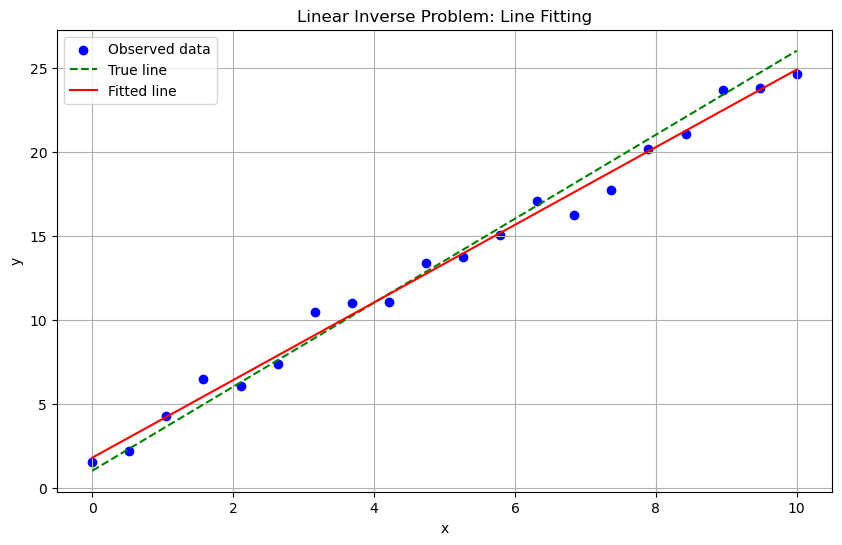

True parameters: slope=2.5, intercept=1.0
Fitted parameters: slope=2.311, intercept=1.775


In [1]:
## Linear Inverse Problem: Line Fitting Example
# This script demonstrates how to solve a linear inverse problem by fitting a line to observed data.
# It uses NumPy for numerical operations and Matplotlib for plotting.
# It generates synthetic data, sets up the linear system, solves it using least squares, and
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)  # For reproducibility
x = np.linspace(0, 10, 20)  # 20 points between 0 and 10
true_slope = 2.5
true_intercept = 1.0
y_true = true_slope * x + true_intercept
noise = np.random.normal(0, 1, len(x))  # Add Gaussian noise
y_obs = y_true + noise

# Set up the linear system G * m = d
# Where G is the design matrix, m is the model parameters, d is the data
G = np.column_stack([x, np.ones_like(x)])  # Design matrix
d = y_obs  # Observed data

# Solve the inverse problem using least squares
# m = (G^T G)^(-1) G^T d
m = np.linalg.inv(G.T @ G) @ G.T @ d
fitted_slope, fitted_intercept = m

# Calculate the predicted data
y_pred = fitted_slope * x + fitted_intercept

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y_obs, color='blue', label='Observed data')
plt.plot(x, y_true, 'g--', label='True line')
plt.plot(x, y_pred, 'r-', label='Fitted line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Inverse Problem: Line Fitting')
plt.legend()
plt.grid(True)
plt.show()

print(f"True parameters: slope={true_slope}, intercept={true_intercept}")
print(f"Fitted parameters: slope={fitted_slope:.3f}, intercept={fitted_intercept:.3f}")

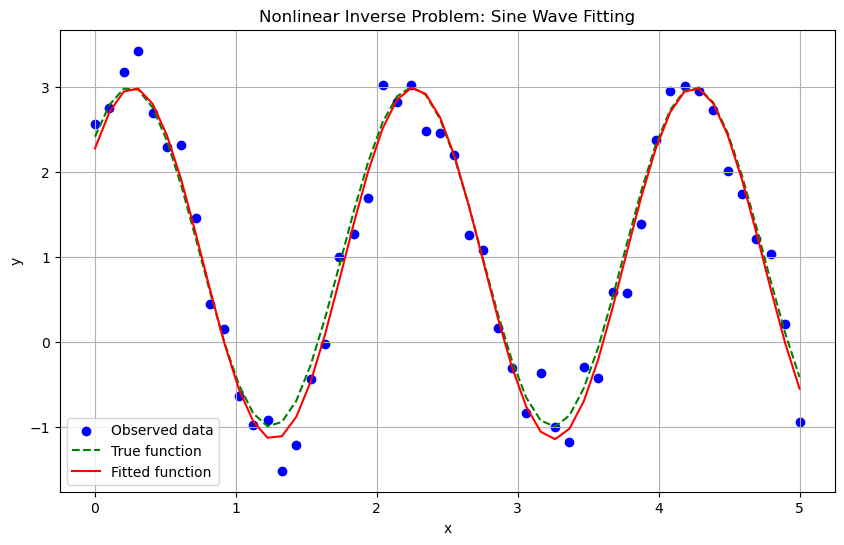

True parameters: A=2.000, f=0.500, phi=0.785, C=1.000
Fitted parameters: A=2.070, f=0.503, phi=0.713, C=0.923


In [ ]:
## Nonlinear Inverse Problem: Sine Wave Fitting Example
# This script demonstrates how to solve a nonlinear inverse problem by fitting a sine wave to observed data.
# It uses NumPy for numerical operations, SciPy for optimization, and Matplotlib for plotting.
# It generates synthetic data, defines a nonlinear function, and uses curve fitting to estimate parameters.
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the nonlinear function to fit (sine wave with amplitude, frequency, phase and offset)
def nonlinear_func(x, A, f, phi, C):
    return A * np.sin(2 * np.pi * f * x + phi) + C

# Generate synthetic data
np.random.seed(42)
x = np.linspace(0, 5, 50)
true_params = [2.0, 0.5, np.pi/4, 1.0]  # [amplitude, frequency, phase, offset]
y_true = nonlinear_func(x, *true_params)
noise = np.random.normal(0, 0.3, len(x))
y_obs = y_true + noise

# Fit the nonlinear function to the data
fitted_params, _ = curve_fit(nonlinear_func, x, y_obs, 
                           p0=[1.5, 0.4, np.pi/4, 0.5])  # Initial parameter guesses

# Calculate fitted curve
y_fit = nonlinear_func(x, *fitted_params)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(x, y_obs, color='blue', label='Observed data')
plt.plot(x, y_true, 'g--', label='True function')
plt.plot(x, y_fit, 'r-', label='Fitted function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nonlinear Inverse Problem: Sine Wave Fitting')
plt.legend()
plt.grid(True)
plt.show()

# Print results
print("True parameters: A={:.3f}, f={:.3f}, phi={:.3f}, C={:.3f}"
      .format(*true_params))
print("Fitted parameters: A={:.3f}, f={:.3f}, phi={:.3f}, C={:.3f}"
      .format(*fitted_params))

# Well-Posed vs Ill-Posed Inverse Problems

## Previous Examples: Well-Posed Problems

The line-fitting and sine-fitting examples we just saw are examples of well-posed inverse problems:
- We had more data points (20-50) than parameters (2-4)
- Solutions exist and are unique
- Small changes in data produce small changes in solutions

## Ill-Posed Problems in Geophysics

Most real geophysical inverse problems are ill-posed:
- Often have more unknowns than data points
- Multiple solutions may fit the data equally well
- Solutions may be unstable - small data changes cause large model changes

### Example Scenarios:
1. Seismic tomography: Inferring velocity structure from limited ray paths
2. Gravity inversion: Finding density distribution from surface measurements
3. Magnetotelluric sounding: Determining conductivity structure from EM fields

# Geophysical Tomography Example

## Seismic Tomography Illustration
```
Surface Stations/Receivers
▼   ▼   ▼   ▼   ▼   ▼   ▼   ▼
═══════════════════════════════  ─┐
░ ·   ·   ·   ·   ·   ·   ░    │
░   ·   ·   ·   ·   ·   ·   ░  │
░ ·   ·   ·  [H]  ·   ·   ░    │ Depth
░   ·   ·   ·   ·   ·   ·   ░  │
░ ·   ·   ·   ·   ·   ·   ░    │
═══════════════════════════════  ─┘
    ▲   ▲   ▲   ▲   ▲   ▲
    Earthquake Sources

Legend:
▼ = Surface receivers
▲ = Seismic sources
· = Model grid points
[H] = High velocity anomaly
░ = Unknown boundary regions
─ = Model boundaries
```

This diagram shows:
1. **Sources & Receivers**: Seismic waves from earthquakes (▲) recorded at surface stations (▼)
2. **Model Grid**: Regular grid of velocity parameters to be determined (·)
3. **Ray Paths**: Waves travel along complex paths through the medium
4. **Target**: Example high velocity anomaly [H] to be imaged
5. **Challenge**: Limited ray coverage leads to an ill-posed problem



For more details on seismic tomography, see the [SEG Wiki article on Seismic Tomography](https://wiki.seg.org/wiki/Seismic_tomography).



## Ray Path Coverage Example
![Ray path coverage](./SEG_Fig3.jpeg)

*Figure 3: Ray path coverage through a velocity model. Source: SEG Wiki*

## Seismic Tomography Example
![Ray path coverage](./SEG_Fig10.jpeg)

*Figure 10: Tomographic inversion results showing velocity structure. Source: SEG Wiki*

## Key inverse problem characteristics:
- Many more model parameters (grid points) than data (ray travel times)
- Non-unique solutions due to incomplete ray coverage
- Need for regularization to obtain stable solutions

## Regularization: Making Ill-Posed Problems Tractable

To solve ill-posed problems, we need additional constraints called regularization:

### Common Regularization Approaches:
1. **Smoothness** constraints: Prefer smoother solutions
   - Minimize spatial gradients
   - Penalize rough solutions

2. **Damping** constraints: Prefer smaller values
   - Keep model parameters close to starting model
   - Avoid extreme values

3. **Prior information** constraints:
   - Known geological structures
   - Physical property bounds
   - Statistical relationships

The mathematical form is typically:
```
minimize: ||Gm - d||² + λ||Lm||²
```
where:
- G = forward operator
- m = model parameters
- d = data
- L = regularization operator
- λ = regularization parameter

The art of inverse theory lies in choosing appropriate regularization for your specific problem.

# Ridge Regression Example: Underdetermined Polynomial Fitting

This example demonstrates regularization of an underdetermined inverse problem using ridge regression (Tikhonov regularization).

## Problem Setup
- 5 data points sampled from a sine wave with added noise
- 8th degree polynomial (9 coefficients) to fit the data
- System is underdetermined: more unknowns (9) than data points (5)

## Ridge Regression Formula
The solution minimizes:
```
||Gm - d||² + λ||m||²
```
where:
- `G`: design matrix of polynomial terms
- `m`: model parameters (polynomial coefficients)
- `d`: observed data
- `λ`: regularization parameter

## Solution
The regularized solution is:
```
m = (G^T G + λI)^(-1) G^T d
```

## Effect of Regularization Parameter λ
The four plots show solutions with different λ values:

1. **λ = 0**: No regularization
   - Exact fit to data
   - Large model norm
   - Unstable, oscillatory solution

2. **λ = 0.001**: Weak regularization
   - Still fits data well
   - Reduced oscillations
   - Smaller model norm

3. **λ = 0.1**: Moderate regularization
   - Balance between data fit and model norm
   - Smoother solution

4. **λ = 1.0**: Strong regularization
   - Poor fit to data
   - Very smooth solution
   - Small model norm

This demonstrates the classic trade-off in inverse problems between:
- Fitting the data (minimizing ||Gm - d||²)
- Model complexity/stability (minimizing ||m||²)

The choice of λ depends on:
- Noise level in the data
- Desired smoothness of solution
- Physical constraints of the problem


λ = 0:
Model norm: 49.910
Data misfit: 3.125e-14

λ = 0.001:
Model norm: 9.354
Data misfit: 3.257e-01

λ = 0.1:
Model norm: 1.463
Data misfit: 9.099e-01

λ = 1.0:
Model norm: 0.362
Data misfit: 1.157e+00


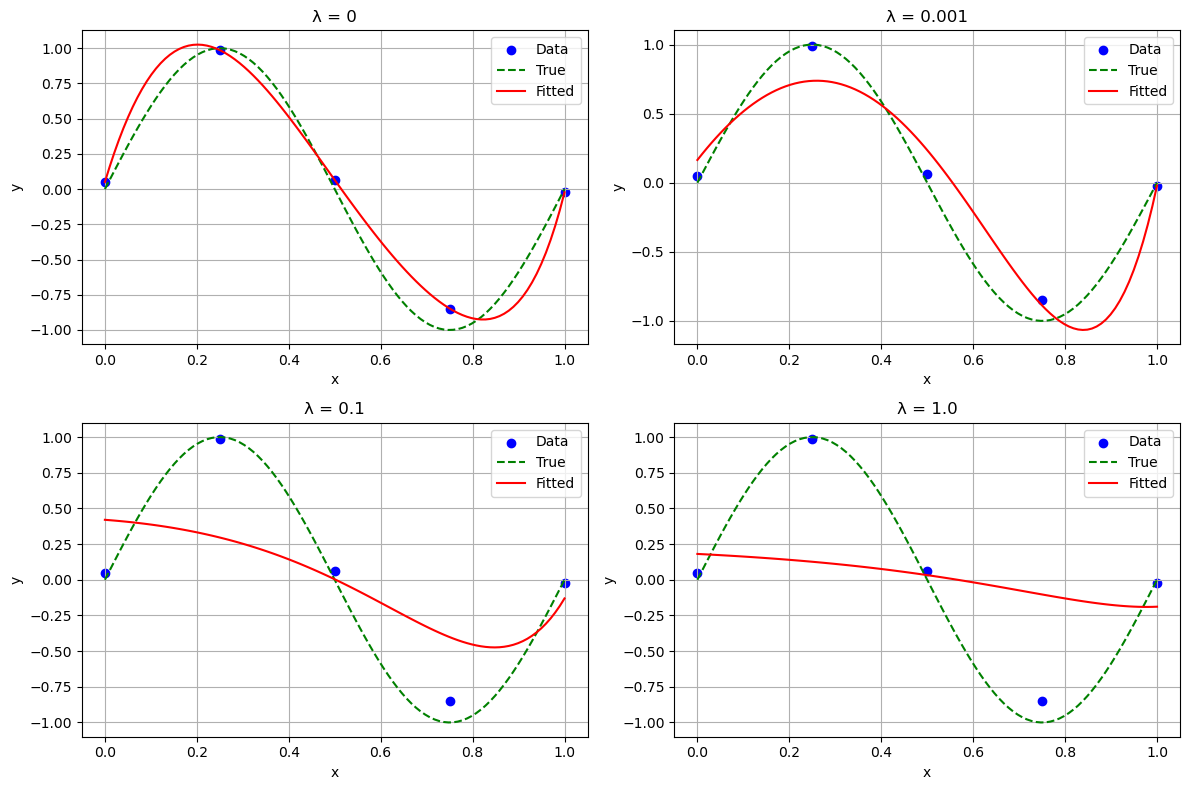

In [ ]:

# Underdetermined Polynomial Fitting with Ridge Regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Generate sparse data
np.random.seed(42)
n_data = 5  # Very few data points
x_data = np.linspace(0, 1, n_data)
y_true = np.sin(2*np.pi*x_data)  # True function is a sine wave
noise = np.random.normal(0, 0.1, n_data)
y_data = y_true + noise

# Create polynomial features (more features than data points)
degree = 8 # High-degree polynomial
poly = PolynomialFeatures(degree)
X = poly.fit_transform(x_data.reshape(-1, 1))  # Design matrix

# Add ridge regression with different regularization strengths
lambdas = [0, 0.001, 0.1, 1.0]  # Regularization parameters
x_plot = np.linspace(0, 1, 100)
X_plot = poly.transform(x_plot.reshape(-1, 1))

plt.figure(figsize=(12, 8))
for i, lambda_ in enumerate(lambdas):
    # Solve ridge regression: (G^T G + λI)m = G^T d
    G = X
    d = y_data
    model = np.linalg.solve(G.T @ G + lambda_ * np.eye(G.shape[1]), G.T @ d)
    
    # Make predictions
    y_pred = X_plot @ model
    
    # Plot
    plt.subplot(2, 2, i+1)
    plt.scatter(x_data, y_data, color='blue', label='Data')
    plt.plot(x_plot, np.sin(2*np.pi*x_plot), 'g--', label='True')
    plt.plot(x_plot, y_pred, 'r-', label='Fitted')
    plt.title(f'λ = {lambda_}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    
    # Print norms
    print(f"\nλ = {lambda_}:")
    print(f"Model norm: {np.linalg.norm(model):.3f}")
    print(f"Data misfit: {np.linalg.norm(G @ model - d):.3e}")

plt.tight_layout()
plt.show()